## Question 1.A

In [16]:
import pandas as pd
import numpy as np
import math
from statistics import mean

sneaker = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
sneaker

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [26]:
summary = sneaker.describe()
summary

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [93]:
sneaker['order_amount'].median()

284.0

Checking for any missing values

In [22]:
sneaker.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

We can conclude that there are no missing(null) values

<p> To figure out where the value \$3145.13, came from (as given in the question), I assumed that it was just taken from the mean of the order amounts. I came up with this assumption from observing that mean of order_amount in the summary chart above, matched the value given. Since the values match exactly, I can safely assume that this was how the value of \$3145.13 was actually calculated. To be sure: </p>

In [19]:
pred_aov = statistics.mean(sneaker.order_amount)
pred_aov

3145.128

We know that the average order value that was calculated is $3145.13, which doesn't make sense as sneakers (on average) are not nearly as expensive. However, we can divide the total revenue by the number of orders for each shop (by grouping by shop_id), and then obtain the average for all of these values.

In [46]:
statistics.mean(sneaker.groupby('shop_id').apply(lambda x: (sum(x['order_amount']))/(sum(x['total_items']))))

407.99

This is still a high average for affordable sneakers. This leads me to believe that there are some outliers which have a very high price, that is driving the mean to be higher than expected. Let's see what the boxplot looks like:

<AxesSubplot:>

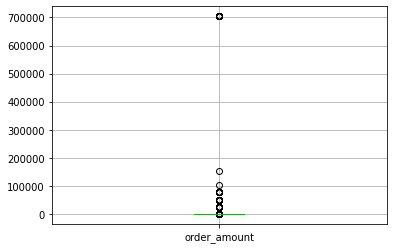

In [47]:
sneaker.boxplot(column = "order_amount")

There are a lot of outliers! Also referring back to the summary chart, I can see that the maximum value for the order_amount is $704000, this is INSANELY high! There is also a standard deviation of about 41282, which means there is a lot of variation within the data points in the order amount column. When thinking about the types of buyers that could exist, there are buyers that are just buying for themselves, or there are store owners/suppliers buying a bulk amount of shoes, which explains the high values order amounts. Let's dig into this issue:

In [54]:
outlier = sneaker.groupby(['order_amount']).size().reset_index(name = 'count_of_order_amount').sort_values(by='order_amount', ascending = False)
outlier.head(15)

,order_amount,count_of_order_amount
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


This chart gives us a visual of how there are several orders of \\$704000, in fact 17 orders, we can also see that the same pattern follows for order amounts of \$51450, \\$25725 with many orders with the exact same amounts.

In [55]:
big_order_amounts = sneaker.sort_values(by= 'order_amount', ascending = False)
big_order_amounts.head(15)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_aov
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0


<p> From the table above, it looks like 1 shop (shop_id is 42) has all the big orders of \$704000. Let us check if this is the case for \$51450 and \$25725 </p>

In [59]:
sneaker.loc[sneaker['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_aov
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0


<p> We can observe from the table above that the same pattern occurs, however for order amounts of \$704000, there are 2000 total items, but for order amounts of \$51450, there are 2 total items, and for order amounts of \$25725, there is only 1 total item. Since double \$25725 is exactly \$51450, this leads me to believe that the orders with \$51450, are just 2 orders of \$25725. I can also conclude that the orders with order amounts of \$704000 could not be justified as a regular buyer (customers only buying a reasonable amount of pairs of shoes at a reasonable price), as it probably is a supplier buying mass amounts of shoes (hence, the 2000 orders). </p>

<p> However the orders of \$25725 seem to be very high if it is just one pair of shoe, I will assume that there was a data entry error for this, and assume it was inputted as cents instead of dollars. I will change both values of \$25725 and \$51450 as dollar amounts, since both order amounts relate to one another. </p>

In [87]:
sneaker.loc[sneaker['order_amount'] == 51450, 'order_amount'] = 514.50
sneaker.loc[sneaker['order_amount'] == 25725, 'order_amount'] = 257.25

In [89]:
sneaker.loc[sneaker['order_amount'].isin([704000, 514.50, 257.25])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_aov
15,16,42,607,704000.00,2000,credit_card,2017-03-07 4:00:00,352.0
1362,1363,42,607,704000.00,2000,credit_card,2017-03-15 4:00:00,352.0
2969,2970,42,607,704000.00,2000,credit_card,2017-03-28 4:00:00,352.0
2835,2836,42,607,704000.00,2000,credit_card,2017-03-28 4:00:00,352.0
4056,4057,42,607,704000.00,2000,credit_card,2017-03-28 4:00:00,352.0
60,61,42,607,704000.00,2000,credit_card,2017-03-04 4:00:00,352.0
2297,2298,42,607,704000.00,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000.00,2000,credit_card,2017-03-12 4:00:00,352.0
1562,1563,42,607,704000.00,2000,credit_card,2017-03-19 4:00:00,352.0
1436,1437,42,607,704000.00,2000,credit_card,2017-03-11 4:00:00,352.0


In [90]:
statistics.mean(sneaker.groupby('shop_id').apply(lambda x: (sum(x['order_amount']))/(sum(x['total_items']))))

260.3928125

An AOV of \\$260.39 seems a lot better!

## Question 1. B

I would report the median for this dataset, since we saw that one shop (shop_id 42) has 17 transactions of 2000 units with the value of \\$704000 from seller 42 (seller_id), which skews the data very heavily. Median values are not as heavily influenced by outliers as opposed to the mean.

## Question 1. C

It's value is \\$284.0 as analyzed above.